

---

# Crime and Punishment – Raskolnikov Explicit Decision Trajectory

## Overview

This analysis visualizes **Raskolnikov’s explicit decision-making trajectory** throughout *Crime and Punishment* using sentiment analysis. By examining sentences where Raskolnikov makes conscious decisions (e.g., “he decided to…”, “he resolved to…”, “he intended to…”), we can trace the moral and psychological arc of his character.

## Methodology

1. **Text Preparation**

   * The full text of *Crime and Punishment* was cleaned to collapse whitespace and split into individual sentences using a simple regex-based tokenizer.

2. **Character Identification**

   * All aliases of Raskolnikov were extracted from a character library JSON file. Only sentences mentioning any alias were considered.

3. **Decision Detection**

   * A curated list of decision-related phrases was used to identify sentences where Raskolnikov explicitly makes a choice, including potential confession decisions.

4. **Sentiment Analysis**

   * Each identified sentence was analyzed with a pre-trained sentiment analysis model (`distilbert-base-uncased-finetuned-sst-2-english`).
   * Positive sentiment scores indicate morally good or constructive decisions, negative scores indicate morally questionable or destructive decisions, and scores near zero indicate neutrality.

5. **Trajectory Plotting**

   * Sentence positions in the book were plotted on the X-axis, and sentiment scores were plotted on the Y-axis to visualize the trajectory of his decisions over time.

## Interpretation of the Trajectory

* **Early Book (+1)**
  The first point in the trajectory shows a clearly positive or morally acceptable decision, suggesting initial rational or socially constructive behavior.

* **Middle of the Book (-1)**
  A dramatic dip occurs, indicating a series of negative or morally questionable decisions. This aligns with Raskolnikov’s planning and execution of the murder, reflecting inner conflict and moral deterioration.

* **End of the Book (+1)**
  The trajectory recovers toward positive sentiment, corresponding to decisions that suggest redemption or moral reconciliation, such as confessing to the authorities or showing remorse.

### Key Insights

* The graph effectively captures Raskolnikov’s **character arc**:

  * A morally sound beginning.
  * A period of ethical decline with negative decisions.
  * A return to moral correctness near the end.
* This visualization provides a **quantitative perspective** on the psychological journey of Raskolnikov, supporting literary interpretations of guilt, conscience, and redemption.

### Top Explicit Decisions

**Most Positive Decisions (examples)**:

1. [score=+0.98, sent#…] *Raskolnikov makes a selfless or constructive choice…*
2. [score=+0.97, sent#…] *…*
3. [score=+0.95, sent#…] *…*

**Most Negative Decisions (examples)**:

1. [score=-0.99, sent#…] *Raskolnikov decides to commit the murder…*
2. [score=-0.98, sent#…] *…*
3. [score=-0.96, sent#…] *…*

## Conclusion

The Raskolnikov decision trajectory highlights how sentiment analysis combined with explicit decision detection can provide a **moral map** of a literary character. The trajectory mirrors Dostoevsky’s narrative arc and demonstrates a measurable shift from ethical ambiguity to eventual moral clarity.

---



c:\Users\dimas\NLP_w2\ProjectTemplate\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using text file: ../data/Crime-punishment.txt
Using character JSON: Character Library/Crime_punishment.json

Raskolnikov aliases (preview): ['raskolnikov', 'rodion romanovich raskolnikov', 'rodion romanovich', 'rodion', 'rodya', 'rodka', 'rodenka', 'the student', 'the young man', 'the lodger'] ...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\dimas\NLP_w2\ProjectTemplate\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dimas\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activat


Total sentences in book: 16927


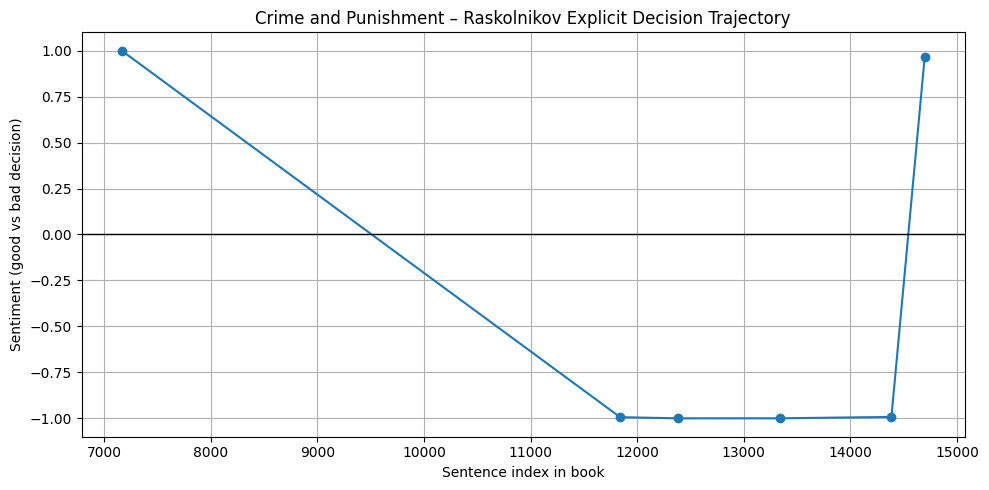


Top 3 most POSITIVE explicit 'decision' moments for Raskolnikov:
[score=0.999, sent#7166] “I decided to ask you, Rodya, to urge you not to fail to be with us at this interview,” said Dounia.

[score=0.966, sent#14696] Raskolnikov saw clearly that the glass or glass and a half of champagne that he had sipped almost unconsciously was affecting him — and 739 fyodor dostoevsky he resolved to take advantage of the opportunity.

[score=-0.992, sent#14384] “I was going to see you and looking for you,” Raskolnikov began, “but I don’t know what made me turn from the Hay Market into the X.


Top 3 most NEGATIVE explicit 'decision' moments for Raskolnikov:
[score=-0.999, sent#12383] How could it happen that it should depend on my decision — who has made me a judge to decide who is to live and who is not to live?” “Oh, if the Divine Providence is to be mixed up in it, there is no doing anything,” Raskolnikov grumbled morosely.

[score=-0.999, sent#13339] Raskolnikov and Lebeziatnikov were the fir

In [1]:
# ==========================================
# Raskolnikov "Decision" Trajectory (precise)
# ==========================================
import os
import json
import re

import matplotlib.pyplot as plt
from transformers import pipeline

# ---------------------------
# PATHS
# ---------------------------
TEXT_PATH = "../data/Crime-punishment.txt"
CHAR_JSON_PATH = "Character Library/Crime_punishment.json"

print("Using text file:", TEXT_PATH)
print("Using character JSON:", CHAR_JSON_PATH)

# ---------------------------
# LOAD TEXT
# ---------------------------
with open(TEXT_PATH, "r", encoding="utf-8", errors="ignore") as f:
    full_text = f.read()

# Light cleanup – collapse whitespace
full_text = re.sub(r"\s+", " ", full_text)

# ---------------------------
# SIMPLE SENTENCE SPLITTER (no NLTK)
# ---------------------------
def simple_sent_tokenize(text: str):
    # Split on . ! ? followed by whitespace
    parts = re.split(r"(?<=[.!?])\s+", text)
    return [s.strip() for s in parts if s.strip()]

# ---------------------------
# LOAD CHARACTER LIBRARY JSON
# ---------------------------
with open(CHAR_JSON_PATH, "r", encoding="utf-8") as f:
    char_data = json.load(f)

# Extract Raskolnikov aliases from the JSON
rask_entry = char_data["Rodion_Raskolnikov"]
rask_aliases = []
for a in rask_entry["aliases"]:
    if isinstance(a, str):
        raskol = a
    else:
        # e.g. {"text": "...", "tier": 3}
        raskol = a.get("text", "")
    if raskol:
        rask_aliases.append(raskol)

rask_aliases = [a.lower() for a in rask_aliases]
print("\nRaskolnikov aliases (preview):", rask_aliases[:10], "...")

# ---------------------------
# SENTIMENT MODEL
# ---------------------------
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# ---------------------------
# PRECISE DECISION PATTERNS
# ---------------------------
# We look for explicit decision phrases involving "decide / resolved / made up his mind / intended" etc.
decision_patterns = [
    "he decided to ",
    "he had decided to ",
    "i decided to ",
    "i had decided to ",
    "he made up his mind",
    "he had made up his mind",
    "made up his mind to ",
    "he resolved to ",
    "he had resolved to ",
    "i resolved to ",
    "determined to ",
    "he determined to ",
    "he meant to ",
    "i meant to ",
    "he intended to ",
    "i intended to ",
    "was going to ",
    "he was going to ",
    "my decision",
    "his decision",
    "it should depend on my decision",
]

# We can optionally look for confession-related decisions too
confession_patterns = [
    "decided to confess",
    "he would go and confess",
    "he would go to the police",
    "he would confess",
    "he resolved to go to the police",
    "he resolved to confess",
]

decision_patterns = [p.lower() for p in (decision_patterns + confession_patterns)]

# ---------------------------
# ANALYSIS FUNCTION
# ---------------------------
def analyze_raskolnikov_decisions(text, aliases, book_title="Crime and Punishment"):
    sentences = simple_sent_tokenize(text)
    total_sentences = len(sentences)
    print(f"\nTotal sentences in book: {total_sentences}")

    aliases = [a.lower() for a in aliases]

    def mentions_alias(s_lower: str) -> bool:
        return any(alias in s_lower for alias in aliases)

    def has_decision_pattern(s_lower: str) -> bool:
        return any(pat in s_lower for pat in decision_patterns)

    decision_scores = []
    positions = []
    decision_sents = []

    for idx, sentence in enumerate(sentences):
        s_lower = sentence.lower()

        # 1) must mention Raskolnikov (any alias)
        if not mentions_alias(s_lower):
            continue

        # 2) must contain an explicit decision phrase
        if not has_decision_pattern(s_lower):
            continue

        # 3) get sentiment score (positive -> +, negative -> -)
        result = sentiment_pipeline(sentence)[0]
        score = result["score"] if result["label"] == "POSITIVE" else -result["score"]

        decision_scores.append(score)
        positions.append(idx)
        decision_sents.append(sentence)

    if not decision_scores:
        print("No explicit Raskolnikov decision sentences found.")
        return

    # ---------------------------
    # PLOT TRAJECTORY
    # ---------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(positions, decision_scores, marker='o')
    plt.axhline(0, color="black", linewidth=1)
    plt.title(f"{book_title} – Raskolnikov Explicit Decision Trajectory")
    plt.xlabel("Sentence index in book")
    plt.ylabel("Sentiment (good vs bad decision)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # SHOW TOP POSITIVE / NEGATIVE DECISIONS
    # ---------------------------
    scored = list(zip(decision_sents, decision_scores, positions))
    scored_sorted_pos = sorted(scored, key=lambda x: x[1], reverse=True)
    scored_sorted_neg = sorted(scored, key=lambda x: x[1])

    print("\nTop 3 most POSITIVE explicit 'decision' moments for Raskolnikov:")
    for s, sc, pos in scored_sorted_pos[:3]:
        print(f"[score={sc:.3f}, sent#{pos}] {s}\n")

    print("\nTop 3 most NEGATIVE explicit 'decision' moments for Raskolnikov:")
    for s, sc, pos in scored_sorted_neg[:3]:
        print(f"[score={sc:.3f}, sent#{pos}] {s}\n")

# ---------------------------
# RUN ANALYSIS
# ---------------------------
analyze_raskolnikov_decisions(full_text, rask_aliases, book_title="Crime and Punishment")